In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
# Read the file into memory

tasks_all = pd.read_csv("data/data1.csv.gzip", compression='gzip', low_memory=False)

# number of entries
tasks_all.shape

tasks_all.head()

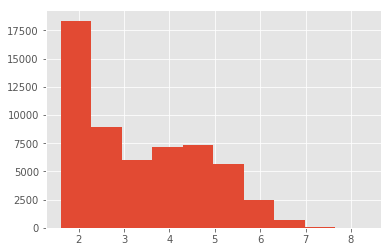

In [6]:
# Plotting the Score
np.log(stories_all.score).hist()

In [18]:

tasks = tasks_all[tasks_all.score > 500].copy()

In [19]:
# Sort by score and select columns
taskss.sort_values('score', ascending=False)
tasks = tasks[['id', 'title' , 'reward', 'time']]

In [20]:
# Change column names
tasks_column = ['task', 'title',  'reward', 'worker']
tasks.columns = tasks_column
tasks.head()

In [65]:
# Write
tasks.to_csv('data/tasks.csv', index=False)

In [22]:
# load the data
feedback_all = pd.read_csv("data/data1.csv.gz", compression='gzip', low_memory=False)

In [23]:
#  size
feedback_all.shape
feedback_all.head()

(450884, 2)

In [25]:

feedback_all.dropna(inplace = True)
feedback_all.columns = ['user', 'story']
# Add a feedback field
feedbacks_all['feedback'] = 1
feedback_all.head()

In [27]:
# Select feedback 
task__feedback = feedback_all[feedback_all['task'].isin(tasks.task)]
# Size of the list
task__feedback.shape

In [66]:
# Size of the list
task__feedback.to_csv('data/data2.csv', index=False)

In [29]:
# All the users that have commented
workers_list = task__feedback.worker.unique()
len(workers_list)
worker = workers_list[0]

In [43]:
def getUserData(workers): 
  
    column_names = ['worker', 'created', 'submitted']
    userDf = pd.DataFrame(columns = column_names)

      
        

In [102]:
def downloadUserAll(workers_list): 
    total = len(workers_list)
    turn = int(total/20)
    start = 0
    end = turn
    
    for i in range(1, 21):
        worker_df_step = getUserData(workers_list[start:end])
        worker_df_step.to_csv("data/workers" + str(i) + ".csv", index=False)
        print(start, end, "data/workers" + str(i) + ".csv")
        start = end
        end = min(end + turn, total)
    

In [104]:
# Lets create the workers database
column_names = ['worker', 'created', 'task', 'submitted']
users = pd.DataFrame(columns = column_names)

for i in range(1,21):
    print(i)
    worker_df_step = pd.read_csv("data/workers" + str(i) + ".csv")
    workers = pd.concat([workers, worker_df_step], ignore_index=True)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [118]:

list(workers.tail().worker), workers_list[-5:]

(['throwaway198411',
  'throwaway292939',
  'throwawaymaroon',
  'throwyfoundr134',
  'trumpownsyou420'],
 array(['throwaway198411', 'throwaway292939', 'throwawaymaroon',
        'throwyfoundr134', 'trumpownsyou420'], dtype=object))

In [119]:
#  workers matrix
users.to_csv('data/users.csv', index=False)